In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
train=pd.read_csv('training_data.csv')
test=pd.read_csv('test_data.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
patient_id                     10000 non-null int64
standard_lab_parameter_name    10000 non-null object
parameter_value                10000 non-null float64
unit                           10000 non-null object
created_at                     10000 non-null object
reference_high                 10000 non-null float64
reference_low                  10000 non-null float64
age_group                      10000 non-null object
gender                         10000 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 703.2+ KB


In [4]:
train.describe(include='all')

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group,gender
count,10000.00000,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000,10000
unique,NaN,5,NaN,30,5802,NaN,NaN,4,4
top,NaN,WBC,NaN,mmol/l,2019-12-25 20:27:39.479,NaN,NaN,adult,male
freq,NaN,3567,NaN,2378,16,NaN,NaN,7795,8841
mean,4999.50000,NaN,356.897325,NaN,NaN,372.848728,162.951938,NaN,NaN
std,2886.89568,NaN,9289.389443,NaN,NaN,1800.575300,712.506331,NaN,NaN
min,0.00000,NaN,-71.000000,NaN,NaN,1.120000,0.000000,NaN,NaN
25%,2499.75000,NaN,6.700000,NaN,NaN,10.000000,4.000000,NaN,NaN
50%,4999.50000,NaN,8.830000,NaN,NaN,12.000000,4.500000,NaN,NaN
75%,7499.25000,NaN,101.000000,NaN,NaN,107.000000,98.000000,NaN,NaN


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Unnamed: 0                     10000 non-null int64
patient_id                     10000 non-null int64
standard_lab_parameter_name    10000 non-null object
parameter_value                10000 non-null float64
unit                           10000 non-null object
created_at                     10000 non-null object
reference_high                 10000 non-null float64
reference_low                  10000 non-null float64
age_group                      10000 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 703.2+ KB


In [6]:
test.describe(include='all')

,Unnamed: 0,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group
count,10000.00000,10000.00000,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000
unique,NaN,NaN,5,NaN,22,4056,NaN,NaN,4
top,NaN,NaN,WBC,NaN,mmol/l,2020-11-14 19:03:47.373248+00:00,NaN,NaN,adult
freq,NaN,NaN,3580,NaN,2281,15,NaN,NaN,7548
mean,4999.50000,4999.50000,NaN,198.373268,NaN,NaN,250.165145,112.542141,NaN
std,2886.89568,2886.89568,NaN,1382.265136,NaN,NaN,1429.726809,562.232336,NaN
min,0.00000,0.00000,NaN,0.050000,NaN,NaN,1.120000,0.000000,NaN
25%,2499.75000,2499.75000,NaN,7.100000,NaN,NaN,10.000000,4.000000,NaN
50%,4999.50000,4999.50000,NaN,9.575000,NaN,NaN,12.000000,4.500000,NaN
75%,7499.25000,7499.25000,NaN,100.000000,NaN,NaN,107.000000,98.000000,NaN


# Exploratory Data Analysis on training and test dataset

The distribution of age in the training dataset is:
adult    7795
old      2017
teen       95
child      93
Name: age_group, dtype: int64


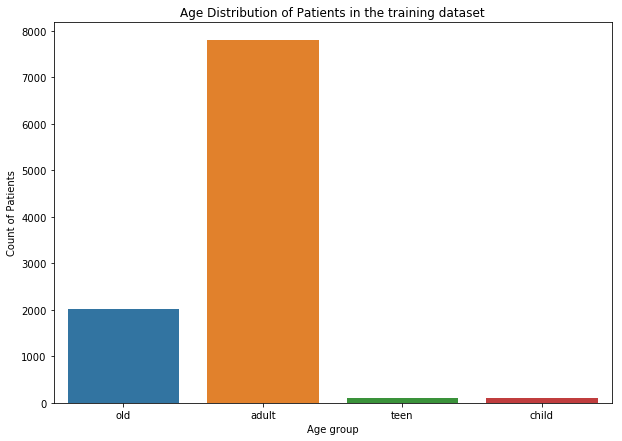

In [7]:
print('The distribution of age in the training dataset is:')
print(train['age_group'].value_counts())
fig, ax = plt.subplots(figsize =(10, 7))
ax = sns.countplot(x='age_group', data=train)
plt.title("Age Distribution of Patients in the training dataset")
plt.xlabel('Age group')
plt.ylabel('Count of Patients')
plt.show()

The distribution of age in the test dataset is:
adult    7548
old      2293
child      83
teen       76
Name: age_group, dtype: int64


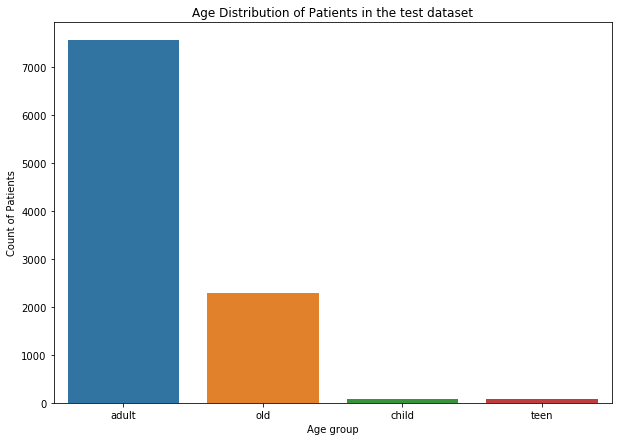

In [8]:
print('The distribution of age in the test dataset is:')
print(test['age_group'].value_counts())
fig, ax = plt.subplots(figsize =(10, 7))
ax = sns.countplot(x='age_group', data=test)
plt.title("Age Distribution of Patients in the test dataset")
plt.xlabel('Age group')
plt.ylabel('Count of Patients')
plt.show()

The number of different units used in the training dataset is: 30


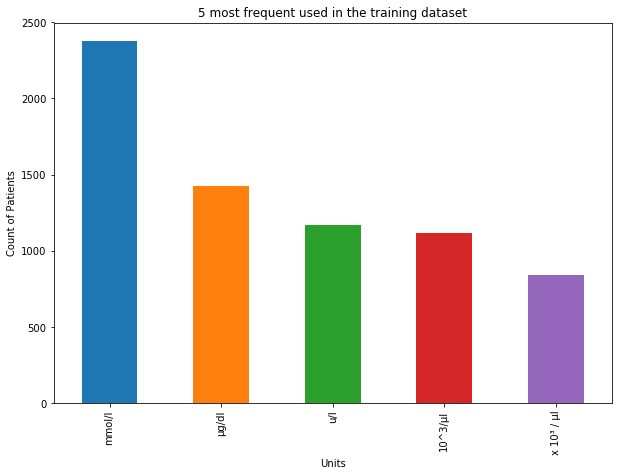

The number of different units used in the test dataset is: 22


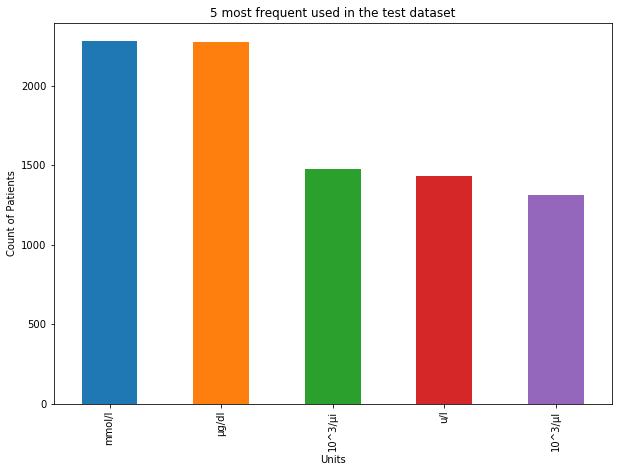

In [9]:
print('The number of different units used in the training dataset is:',train['unit'].nunique())
train['unit'].value_counts().nlargest(5).plot(kind='bar', figsize=(10,7))
plt.title('5 most frequent used in the training dataset')
plt.xlabel('Units')
plt.ylabel('Count of Patients')
plt.show()
print('The number of different units used in the test dataset is:',test['unit'].nunique())
test['unit'].value_counts().nlargest(5).plot(kind='bar', figsize=(10,7))
plt.title('5 most frequent used in the test dataset')
plt.xlabel('Units')
plt.ylabel('Count of Patients')
plt.show()

In [10]:
print('The distribution of standard_lab_parameter_name in the training dataset is as follows:')
print(train['standard_lab_parameter_name'].value_counts())
print('The distribution of standard_lab_parameter_name in the test dataset is as follows:')
print(test['standard_lab_parameter_name'].value_counts())

The distribution of standard_lab_parameter_name in the training dataset is as follows:
WBC         3567
T4          2796
Sodium      1269
Chloride    1196
SGPT        1172
Name: standard_lab_parameter_name, dtype: int64
The distribution of standard_lab_parameter_name in the test dataset is as follows:
WBC         3580
T4          2482
SGPT        1447
Sodium      1260
Chloride    1231
Name: standard_lab_parameter_name, dtype: int64


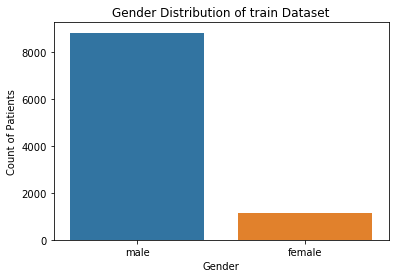

In [11]:
train['gender']=train['gender'].str.lower()
ax = sns.countplot(x='gender', data=train)
plt.title("Gender Distribution of train Dataset")
plt.xlabel('Gender')
plt.ylabel('Count of Patients')
plt.show()

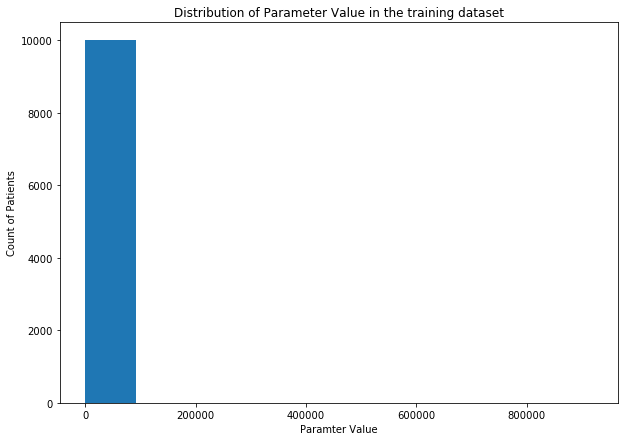

In [12]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(train['parameter_value'])
plt.title('Distribution of Parameter Value in the training dataset')
plt.xlabel('Paramter Value')
plt.ylabel('Count of Patients')
plt.show()

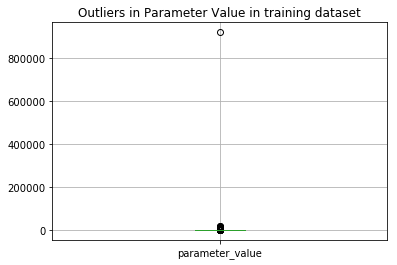

In [13]:
train.boxplot(column='parameter_value')
plt.title('Outliers in Parameter Value in training dataset')
plt.show()

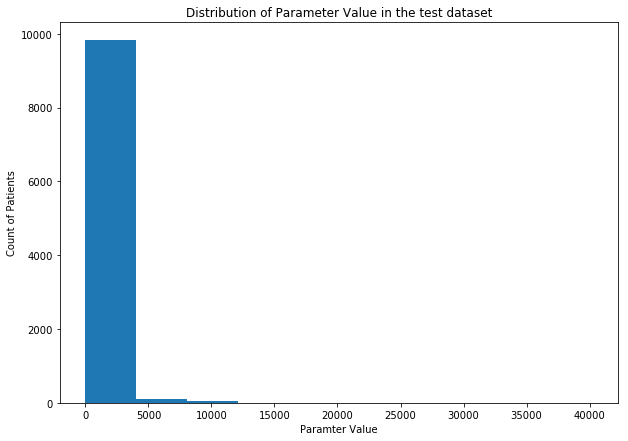

In [14]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(test['parameter_value'])
plt.title('Distribution of Parameter Value in the test dataset')
plt.xlabel('Paramter Value')
plt.ylabel('Count of Patients')
plt.show()

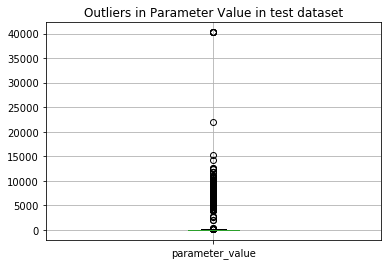

In [15]:
test.boxplot(column='parameter_value')
plt.title('Outliers in Parameter Value in test dataset')
plt.show()

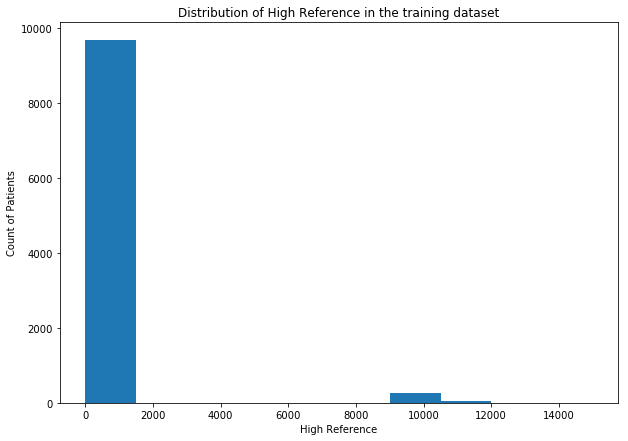

In [16]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(train['reference_high'])
plt.title('Distribution of High Reference in the training dataset')
plt.xlabel('High Reference')
plt.ylabel('Count of Patients')
plt.show()

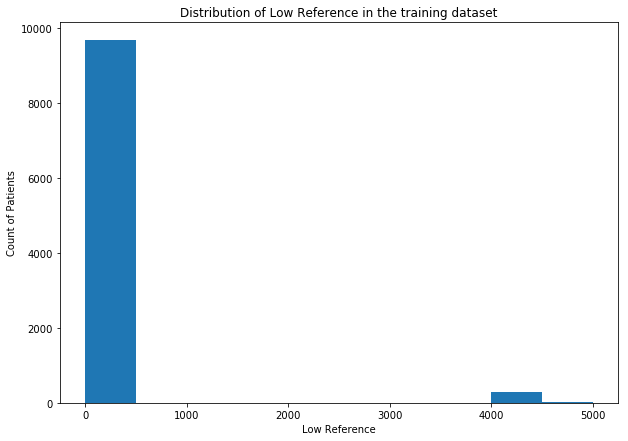

In [17]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(train['reference_low'])
plt.title('Distribution of Low Reference in the training dataset')
plt.xlabel('Low Reference')
plt.ylabel('Count of Patients')
plt.show()

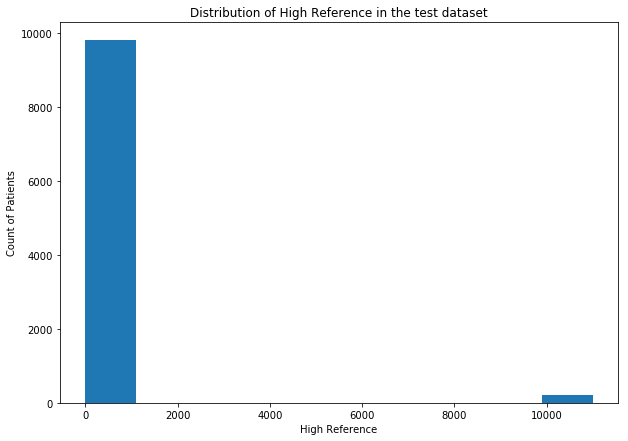

In [18]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(test['reference_high'])
plt.title('Distribution of High Reference in the test dataset')
plt.xlabel('High Reference')
plt.ylabel('Count of Patients')
plt.show()

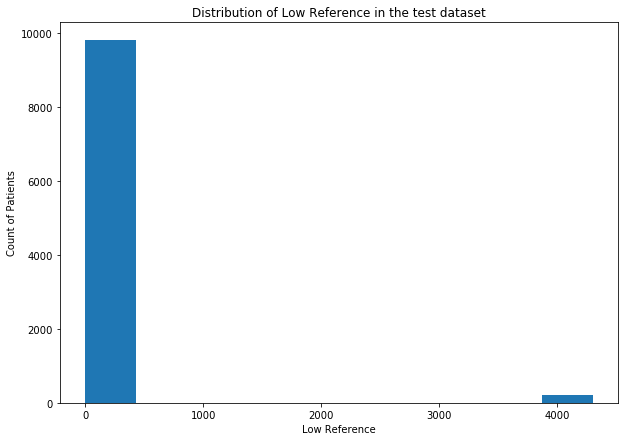

In [19]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(test['reference_low'])
plt.title('Distribution of Low Reference in the test dataset')
plt.xlabel('Low Reference')
plt.ylabel('Count of Patients')
plt.show()

In [20]:
print('Number of Unique Patients in Training Dataset:',train['patient_id'].nunique())
print('Number of Unique Patients in Test Dataset:',test['patient_id'].nunique())

Number of Unique Patients in Training Dataset: 10000
Number of Unique Patients in Test Dataset: 10000


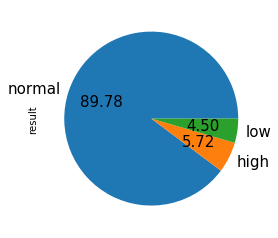

In [21]:
train['result']=np.nan
train.loc[train['parameter_value']>train['reference_high'], 'result']='high'
train.loc[train['parameter_value']<train['reference_low'], 'result']='low'
train.loc[(train['parameter_value']<=train['reference_high']) & (train['parameter_value']>=train['reference_low']), 'result']='normal'
train['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')

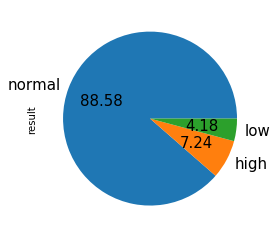

In [22]:
test['result']=np.nan
test.loc[test['parameter_value']>test['reference_high'], 'result']='high'
test.loc[test['parameter_value']<test['reference_low'], 'result']='low'
test.loc[(test['parameter_value']<=test['reference_high']) & (test['parameter_value']>=test['reference_low']), 'result']='normal'
test['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')

# Conversion of Units to Standard units

In [23]:
train_WBC=train.loc[train['standard_lab_parameter_name']=='WBC']
test_WBC=test.loc[test['standard_lab_parameter_name']=='WBC']

In [24]:
train_WBC['unit'].value_counts()

10^3/μl          1115
x 10³ / µl        843
10^3/&micro;i     588
10^3/μi           570
cells/μl          221
thou/mm3           78
cells/cumm         53
10^3/ul            31
cells/cum          21
thou/μl            18
cells/cu.mm        11
/cumm              10
/cmm                4
cells               2
cells/hpf           1
103/μl              1
Name: unit, dtype: int64

In [25]:
test_WBC['unit'].value_counts()

10^3/μi        1477
10^3/μl        1314
thou/mm3        276
10^9/l          229
cells/cumm      103
10^3/ul          51
/cmm             39
/cumm            31
thou/μl          26
cells/cu.mm      26
103/μl            7
cells/μl          1
Name: unit, dtype: int64

In [26]:
unit_corrupt= {'x 10³ / µl':'10^3/μl','10^9/l':'10^3/μl','10^3/&micro;i':'10^3/μl','cells/cu.mm':'cells/cumm','/cumm':'cells/cumm','/cmm':'cells/cumm','cells/μl':'cells/cumm','cells':'cells/cumm','cells/cum':'cells/cumm','103/μl':'10^3/μl','10^3/μi':'10^3/μl','10^3/ul':'10^3/μl','thou/mm3':'10^3/μl','thou/μl':'10^3/μl'}
for item in unit_corrupt.keys():
    train_WBC['unit'] = train_WBC['unit'].replace(item, unit_corrupt[item])
    test_WBC['unit'] = test_WBC['unit'].replace(item, unit_corrupt[item])

C:\Users\HP\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
train_WBC['reference_low'].loc[train_WBC['unit']=='cells/cumm']=train_WBC['reference_low']/1000
train_WBC['reference_high'].loc[train_WBC['unit']=='cells/cumm']=train_WBC['reference_high']/1000
train_WBC['parameter_value'].loc[train_WBC['unit']=='cells/cumm']=train_WBC['parameter_value']/1000
test_WBC['reference_low'].loc[test_WBC['unit']=='cells/cumm']=test_WBC['reference_low']/1000
test_WBC['reference_high'].loc[test_WBC['unit']=='cells/cumm']=test_WBC['reference_high']/1000
test_WBC['parameter_value'].loc[test_WBC['unit']=='cells/cumm']=test_WBC['parameter_value']/1000

C:\Users\HP\Anaconda3\New folder\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\HP\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\New fo

In [28]:
unit_corrupt= {'cells/cumm':'10^3/μl'}
for item in unit_corrupt.keys():
    train_WBC['unit'] = train_WBC['unit'].replace(item, unit_corrupt[item])
    test_WBC['unit'] = test_WBC['unit'].replace(item, unit_corrupt[item])

C:\Users\HP\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
train_WBC['unit'].value_counts()

10^3/μl      3566
cells/hpf       1
Name: unit, dtype: int64

In [30]:
train_WBC=train_WBC.drop(train_WBC.loc[train_WBC['unit']=='cells/hpf'].index)

In [31]:
train_WBC['reference_low'].value_counts()

4.0    3489
5.0      24
4.5      22
5.2      17
5.7      11
5.4       2
4.3       1
Name: reference_low, dtype: int64

In [32]:
test_WBC['unit'].value_counts()

10^3/μl    3580
Name: unit, dtype: int64

In [33]:
train_T4=train.loc[train['standard_lab_parameter_name']=='T4']
test_T4=test.loc[test['standard_lab_parameter_name']=='T4']

In [34]:
train_T4['unit'].value_counts()

μg/dl          1422
µg/dl           799
&micro;g/dl     351
ng/dl           156
ug/dl            66
nmol/l            1
g/l               1
Name: unit, dtype: int64

In [35]:
test_T4['unit'].value_counts()

μg/dl     2278
ng/dl      184
ug/dl       18
pmol/l       2
Name: unit, dtype: int64

In [36]:
train_T4=train_T4.drop(train_T4.loc[train_T4['unit']=='nmol/l'].index)
train_T4=train_T4.drop(train_T4.loc[train_T4['unit']=='g/l'].index)
train_T4=train_T4.drop(train_T4.loc[train_T4['unit']=='ng/dl'].index)
test_T4=test_T4.drop(test_T4.loc[test_T4['unit']=='pmol/l'].index)
test_T4=test_T4.drop(test_T4.loc[test_T4['unit']=='ng/dl'].index)

In [37]:
train_T4['reference_low'].value_counts()

4.50    1744
5.50     466
4.87     184
5.00     100
4.60      65
6.09      41
5.60      11
5.01      10
5.10       7
5.20       4
5.74       3
6.00       2
3.20       1
Name: reference_low, dtype: int64

In [38]:
train_T4['unit']='μg/dl'
test_T4['unit']='μg/dl'

In [39]:
train_Na=train.loc[train['standard_lab_parameter_name']=='Sodium']
test_Na=test.loc[test['standard_lab_parameter_name']=='Sodium']

In [40]:
train_Na['unit'].value_counts()

mmol/l    1230
meq/l       39
Name: unit, dtype: int64

In [41]:
test_Na['unit'].value_counts()

mmol/l    1161
meq/l       99
Name: unit, dtype: int64

In [42]:
train_Na['unit']='mmol/l'
test_Na['unit']='mmol/l'

C:\Users\HP\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
test_SGPT=test.loc[test['standard_lab_parameter_name']=='SGPT']
train_SGPT=train.loc[train['standard_lab_parameter_name']=='SGPT']

In [44]:
train_SGPT['unit'].value_counts()

u/l     1166
iu/l       5
iu         1
Name: unit, dtype: int64

In [45]:
test_SGPT['unit'].value_counts()

u/l     1431
iu/l      16
Name: unit, dtype: int64

In [46]:
train_SGPT=train_SGPT.drop(train_SGPT.loc[train_SGPT['unit']=='iu/l'].index)
train_SGPT=train_SGPT.drop(train_SGPT.loc[train_SGPT['unit']=='iu'].index)
test_SGPT=test_SGPT.drop(test_SGPT.loc[test_SGPT['unit']=='iu/l'].index)

In [47]:
train_SGPT['reference_low'].value_counts()

0.0     469
16.0    415
13.0    160
14.0     81
10.0     29
7.0       4
1.0       3
5.0       1
6.0       1
21.0      1
30.0      1
24.0      1
Name: reference_low, dtype: int64

In [99]:
train_Cl=train.loc[train['standard_lab_parameter_name']=='Chloride']
test_Cl=test.loc[test['standard_lab_parameter_name']=='Chloride']

In [100]:
train_Cl['unit'].value_counts()

mmol/l    1148
meq/l       34
μiu/ml      12
pg/ml        2
Name: unit, dtype: int64

In [101]:
test_Cl['unit'].value_counts()

mmol/l    1120
meq/l       91
μiu/ml      17
ng/ml        2
μg/dl        1
Name: unit, dtype: int64

In [102]:
train_Cl=train_Cl.drop(train_Cl.loc[train_Cl['unit']=='μiu/ml'].index)
train_Cl=train_Cl.drop(train_Cl.loc[train_Cl['unit']=='pg/ml'].index)
test_Cl=test_Cl.drop(test_Cl.loc[test_Cl['unit']=='μiu/ml'].index)
test_Cl=test_Cl.drop(test_Cl.loc[test_Cl['unit']=='pg/ml'].index)
test_Cl=test_Cl.drop(test_Cl.loc[test_Cl['unit']=='μg/dl'].index)

In [103]:
train_Cl['unit']='mmol/l'
test_Cl['unit']='mmol/l'

In [53]:
train_Cl['reference_low'].value_counts()

98.0     1022
101.0      93
99.0       44
94.0       11
96.0        7
15.0        5
Name: reference_low, dtype: int64

In [54]:
train_upd=train_WBC.append(train_SGPT)
train_upd=train_upd.append(train_T4)
train_upd=train_upd.append(train_Na)
train_upd=train_upd.append(train_Cl)

In [55]:
train_upd['unit'].value_counts()

10^3/μl    3566
μg/dl      2638
mmol/l     2451
u/l        1166
Name: unit, dtype: int64

In [56]:
train_upd.shape

(9821, 10)

In [57]:
test_upd=test_WBC.append(test_SGPT)
test_upd=test_upd.append(test_T4)
test_upd=test_upd.append(test_Na)
test_upd=test_upd.append(test_Cl)

In [58]:
test_upd.shape

(9780, 10)

In [59]:
test_upd['unit'].value_counts()

10^3/μl    3580
mmol/l     2473
μg/dl      2296
u/l        1431
Name: unit, dtype: int64

## Outliers after unit conversion

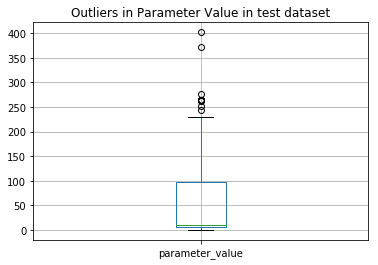

In [73]:
test_upd.boxplot(column='parameter_value')
plt.title('Outliers in Parameter Value in test dataset')
plt.show()

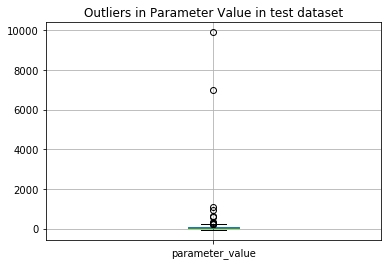

In [75]:
train_upd.boxplot(column='parameter_value')
plt.title('Outliers in Parameter Value in test dataset')
plt.show()

# Visualizing test results

## By Test type

Results of WBC Test:


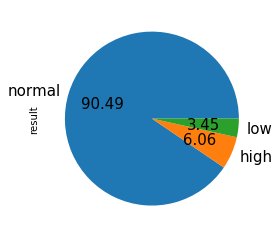

Results of T4 Test:


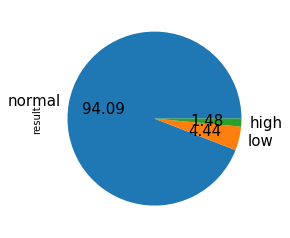

Results of SGPT Test:


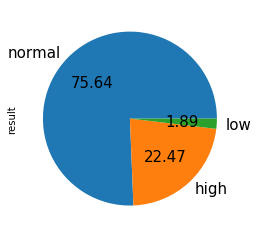

Results of Chloride Test:


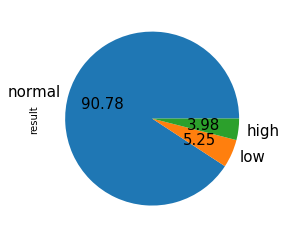

Results of Sodium Test:


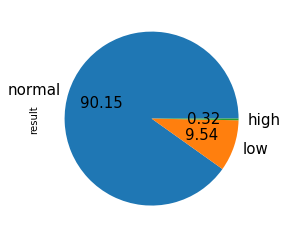

In [60]:
print("Results of WBC Test:")
train_WBC['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print("Results of T4 Test:")
train_T4['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print("Results of SGPT Test:")
train_SGPT['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print("Results of Chloride Test:")
train_Cl['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print("Results of Sodium Test:")
train_Na['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()

Results of WBC Test:


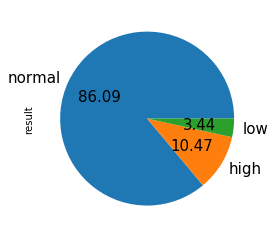

Results of T4 Test:


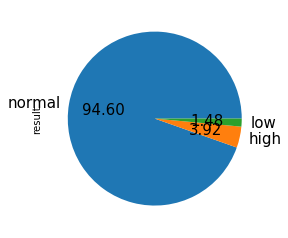

Results of SGPT Test:


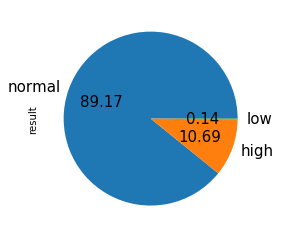

Results of Chloride Test:


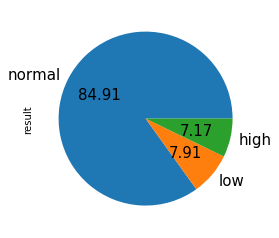

Results of Sodium Test:


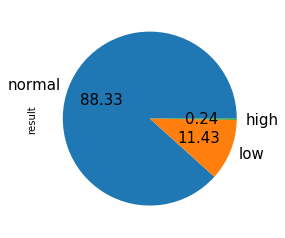

In [61]:
print("Results of WBC Test:")
test_WBC['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print("Results of T4 Test:")
test_T4['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print("Results of SGPT Test:")
test_SGPT['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print("Results of Chloride Test:")
test_Cl['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print("Results of Sodium Test:")
test_Na['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()

## By Age group

Test results for children:


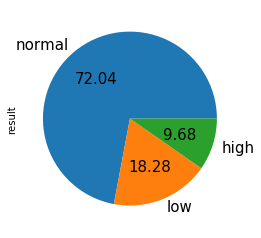

Test results for teens:


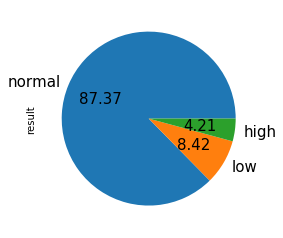

Test results for adults:


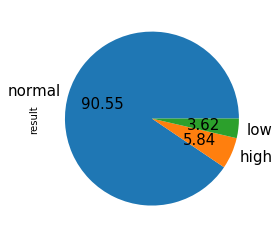

Test results for old:


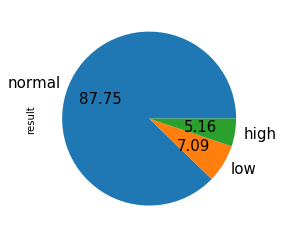

In [62]:
print('Test results for children:')
df=train.loc[(train['age_group']=='child')]
df['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print('Test results for teens:')
df=train.loc[(train['age_group']=='teen')]
df['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print('Test results for adults:')
df=train.loc[(train['age_group']=='adult')]
df['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print('Test results for old:')
df=train.loc[(train['age_group']=='old')]
df['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()

## By gender

Test results for male:


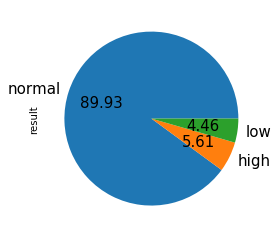

Test results for female:


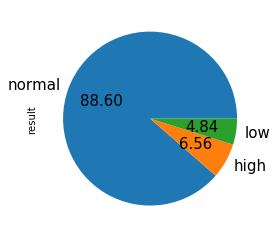

In [63]:
print('Test results for male:')
df=train.loc[(train['gender']=='male')]
df['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()
print('Test results for female:')
df=train.loc[(train['gender']=='female')]
df['result'].value_counts().plot(kind='pie',textprops={'fontsize': 15},autopct='%.2f')
plt.show()

# The most common reference standards for all the tests for male and female

## WBC test

For an child the reference standards are as follows:
High reference Standards:


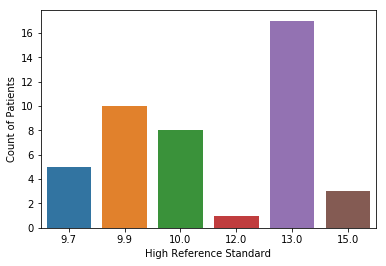

Low reference Standards:


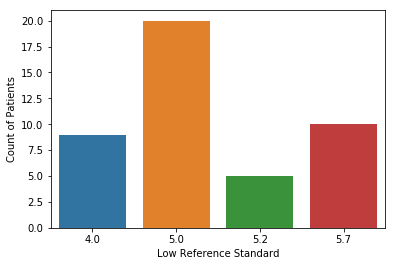

For an teen the reference standards are as follows:
High reference Standards:


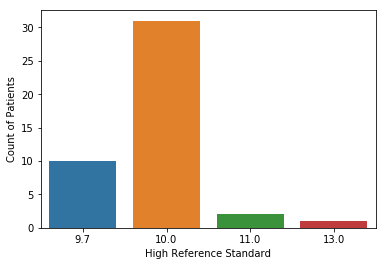

Low reference Standards:


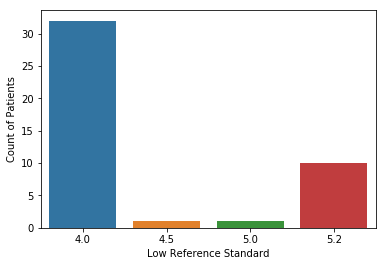

For an adult the reference standards are as follows:
High reference Standards:


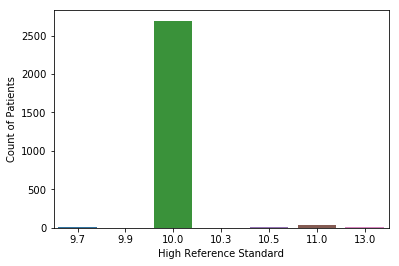

Low reference Standards:


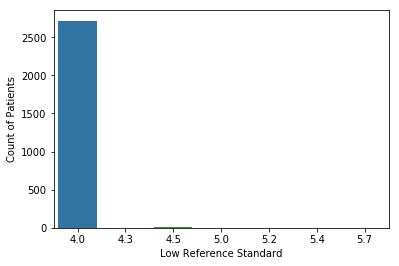

For an old the reference standards are as follows:
High reference Standards:


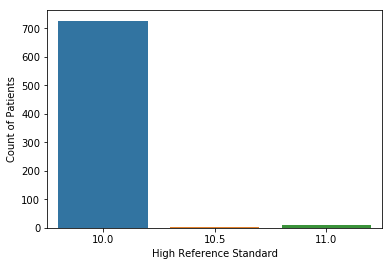

Low reference Standards:


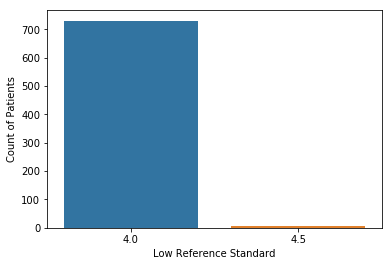

In [64]:
print("For an child the reference standards are as follows:")
df=train_WBC.loc[(train_WBC['age_group']=='child')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an teen the reference standards are as follows:")
df=train_WBC.loc[(train_WBC['age_group']=='teen')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an adult the reference standards are as follows:")
df=train_WBC.loc[(train_WBC['age_group']=='adult')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an old the reference standards are as follows:")
df=train_WBC.loc[(train_WBC['age_group']=='old')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()

## T4 test

For an child the reference standards are as follows:
High reference Standards:


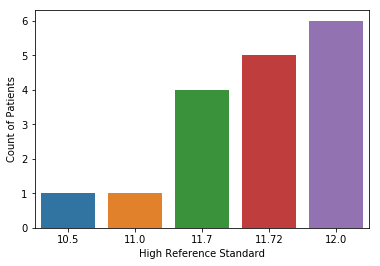

Low reference Standards:


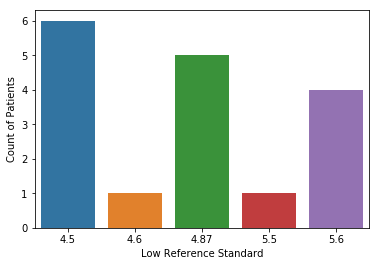

For an teen the reference standards are as follows:
High reference Standards:


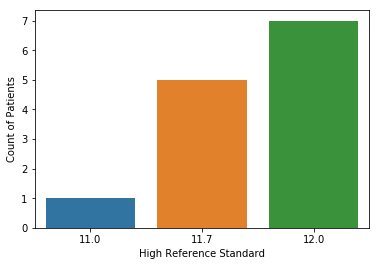

Low reference Standards:


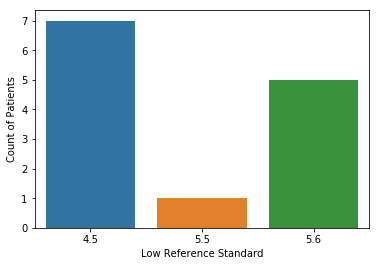

For an adult the reference standards are as follows:
High reference Standards:


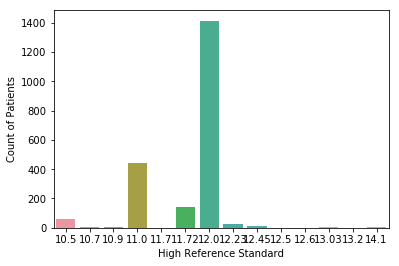

Low reference Standards:


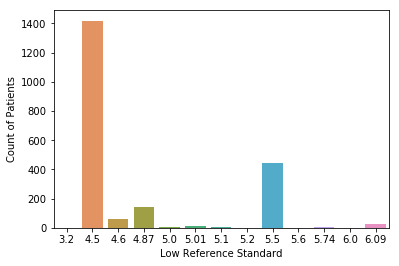

For an old the reference standards are as follows:
High reference Standards:


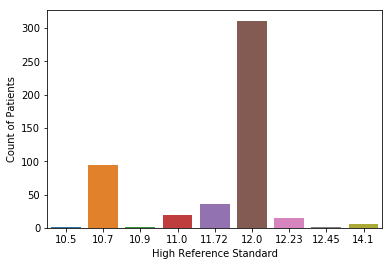

Low reference Standards:


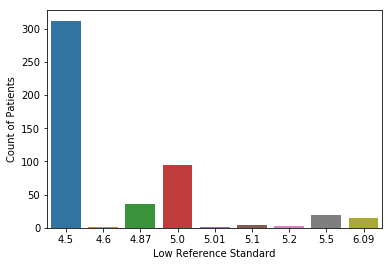

In [65]:
print("For an child the reference standards are as follows:")
df=train_T4.loc[(train_T4['age_group']=='child')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an teen the reference standards are as follows:")
df=train_T4.loc[(train_T4['age_group']=='teen')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an adult the reference standards are as follows:")
df=train_T4.loc[(train_T4['age_group']=='adult')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an old the reference standards are as follows:")
df=train_T4.loc[(train_T4['age_group']=='old')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()

## SGPT test

For an child the reference standards are as follows:
High reference Standards:


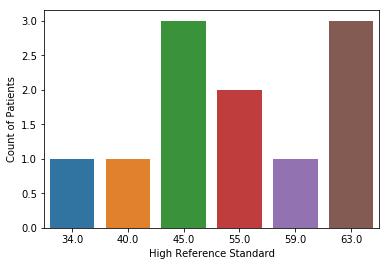

Low reference Standards:


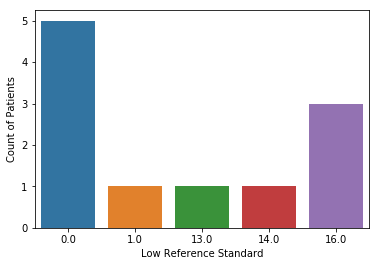

For an teen the reference standards are as follows:
High reference Standards:


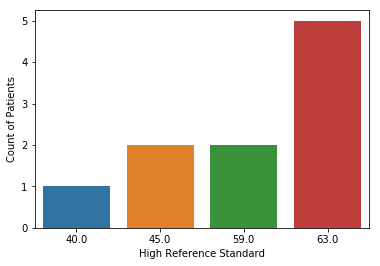

Low reference Standards:


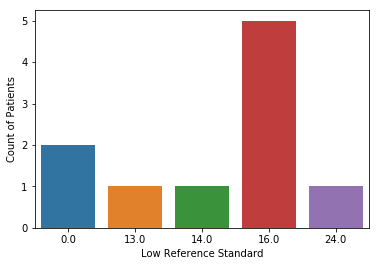

For an adult the reference standards are as follows:
High reference Standards:


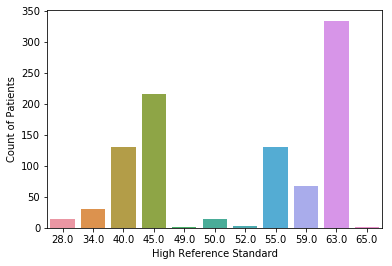

Low reference Standards:


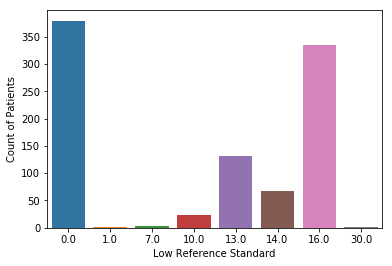

For an old the reference standards are as follows:
High reference Standards:


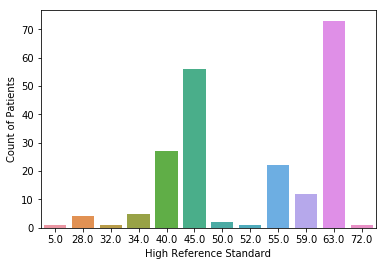

Low reference Standards:


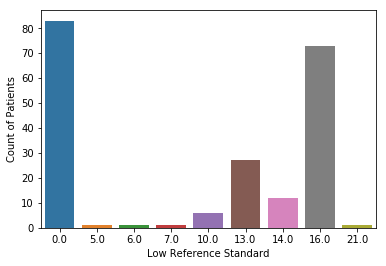

In [66]:
print("For an child the reference standards are as follows:")
df=train_SGPT.loc[(train_SGPT['age_group']=='child')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an teen the reference standards are as follows:")
df=train_SGPT.loc[(train_SGPT['age_group']=='teen')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an adult the reference standards are as follows:")
df=train_SGPT.loc[(train_SGPT['age_group']=='adult')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an old the reference standards are as follows:")
df=train_SGPT.loc[(train_SGPT['age_group']=='old')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()

## Chloride test

For an child the reference standards are as follows:
High reference Standards:


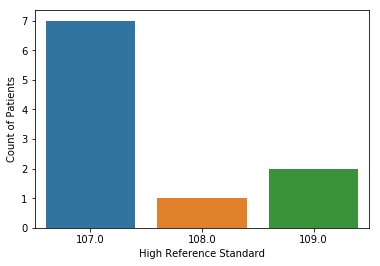

Low reference Standards:


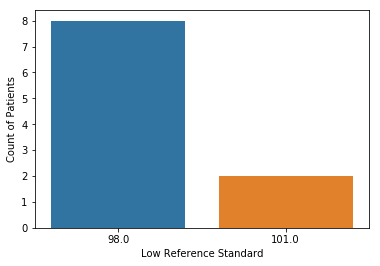

For an teen the reference standards are as follows:
High reference Standards:


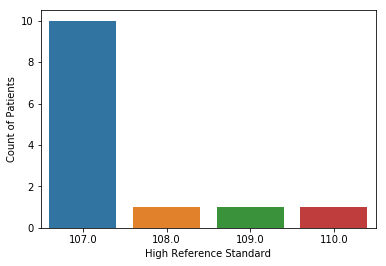

Low reference Standards:


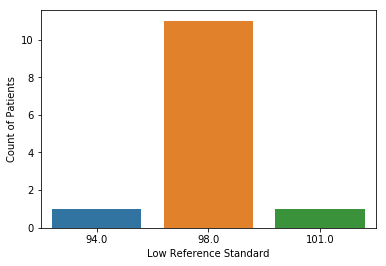

For an adult the reference standards are as follows:
High reference Standards:


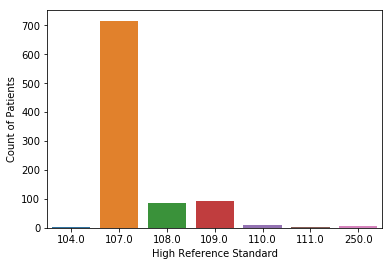

Low reference Standards:


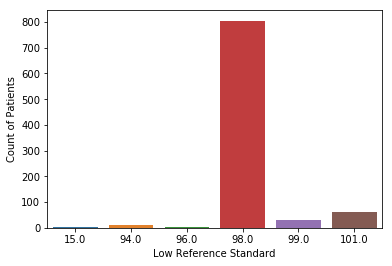

For an old the reference standards are as follows:
High reference Standards:


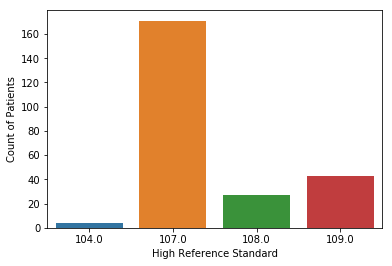

Low reference Standards:


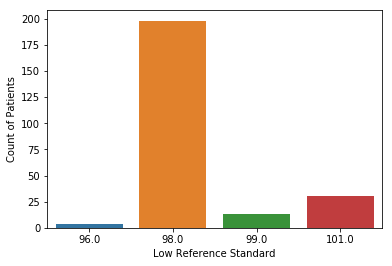

In [67]:
print("For an child the reference standards are as follows:")
df=train_Cl.loc[(train_Cl['age_group']=='child')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an teen the reference standards are as follows:")
df=train_Cl.loc[(train_Cl['age_group']=='teen')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an adult the reference standards are as follows:")
df=train_Cl.loc[(train_Cl['age_group']=='adult')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an old the reference standards are as follows:")
df=train_Cl.loc[(train_Cl['age_group']=='old')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()

## Sodium Test

For an child the reference standards are as follows:
High reference Standards:


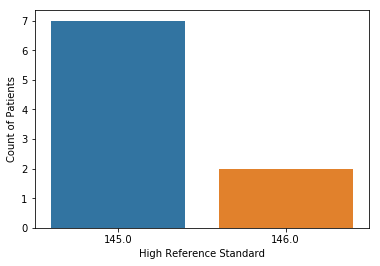

Low reference Standards:


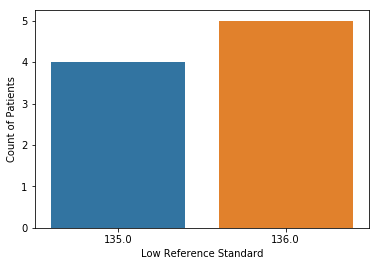

For an teen the reference standards are as follows:
High reference Standards:


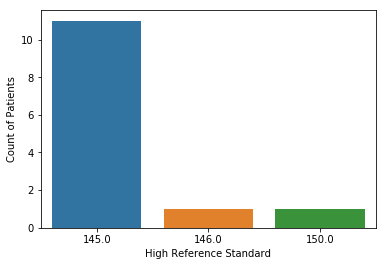

Low reference Standards:


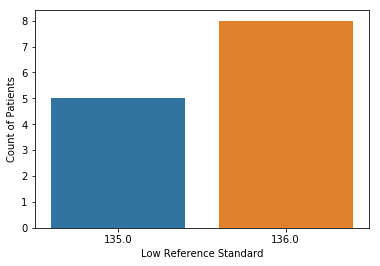

For an adult the reference standards are as follows:
High reference Standards:


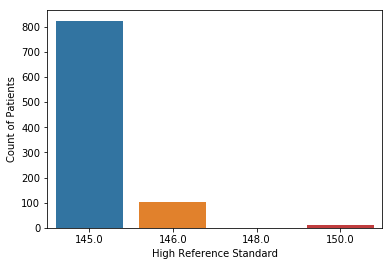

Low reference Standards:


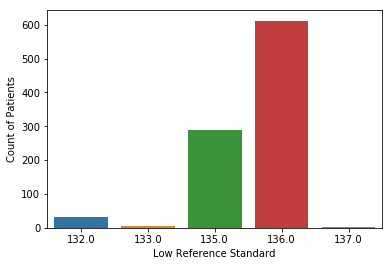

For an old the reference standards are as follows:
High reference Standards:


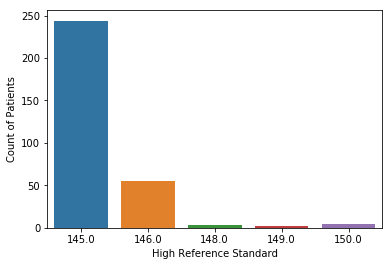

Low reference Standards:


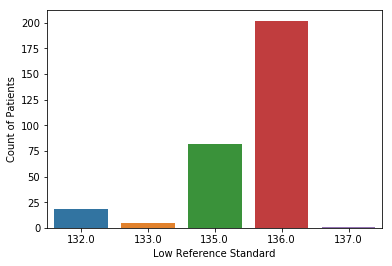

In [68]:
print("For an child the reference standards are as follows:")
df=train_Na.loc[(train_Na['age_group']=='child')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an teen the reference standards are as follows:")
df=train_Na.loc[(train_Na['age_group']=='teen')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an adult the reference standards are as follows:")
df=train_Na.loc[(train_Na['age_group']=='adult')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("For an old the reference standards are as follows:")
df=train_Na.loc[(train_Na['age_group']=='old')]
print("High reference Standards:")
ax = sns.countplot(x='reference_high', data=df)
plt.xlabel('High Reference Standard')
plt.ylabel('Count of Patients')
plt.show()
print("Low reference Standards:")
ax = sns.countplot(x='reference_low', data=df)
plt.xlabel('Low Reference Standard')
plt.ylabel('Count of Patients')
plt.show()

## Correlation of features

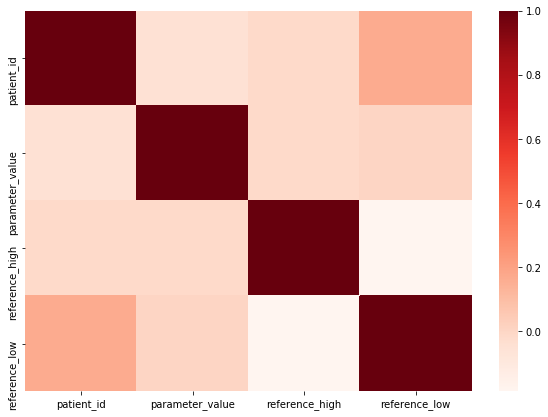

In [69]:
plt.figure(figsize=(10,7))
cor = df.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

C:\Users\HP\Anaconda3\New folder\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


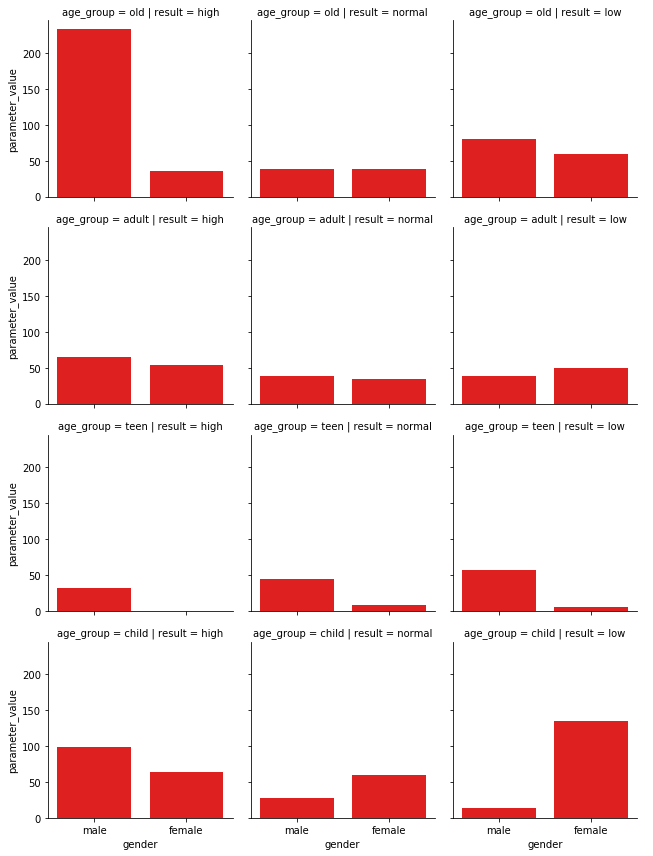

In [70]:
grid = sns.FacetGrid(train_upd, row='age_group', col='result')
grid.map(sns.barplot, 'gender', 'parameter_value', ci=None, color='red')
grid.add_legend()

C:\Users\HP\Anaconda3\New folder\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


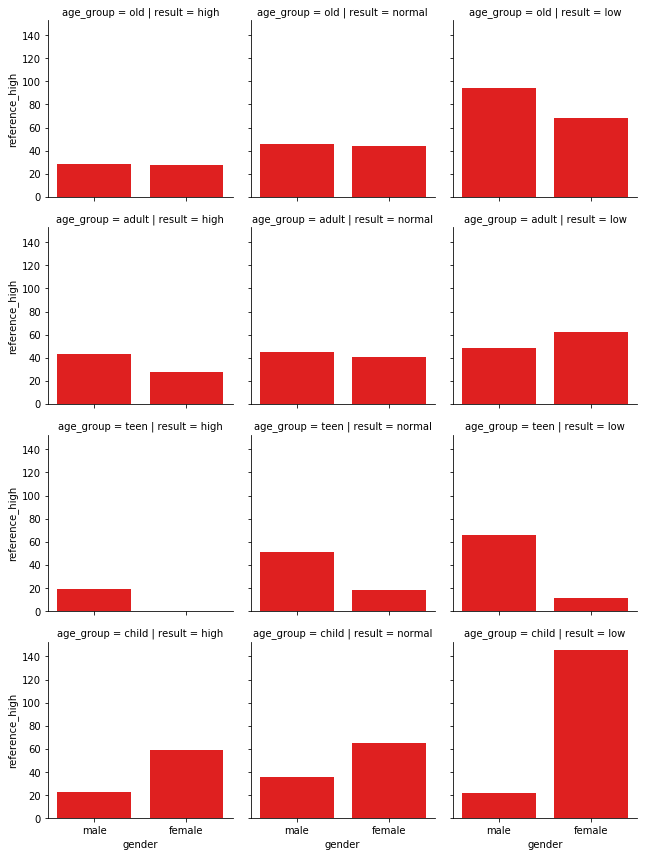

In [71]:
grid = sns.FacetGrid(train_upd, row='age_group', col='result')
grid.map(sns.barplot, 'gender', 'reference_high', ci=None, color='red')
grid.add_legend()

C:\Users\HP\Anaconda3\New folder\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


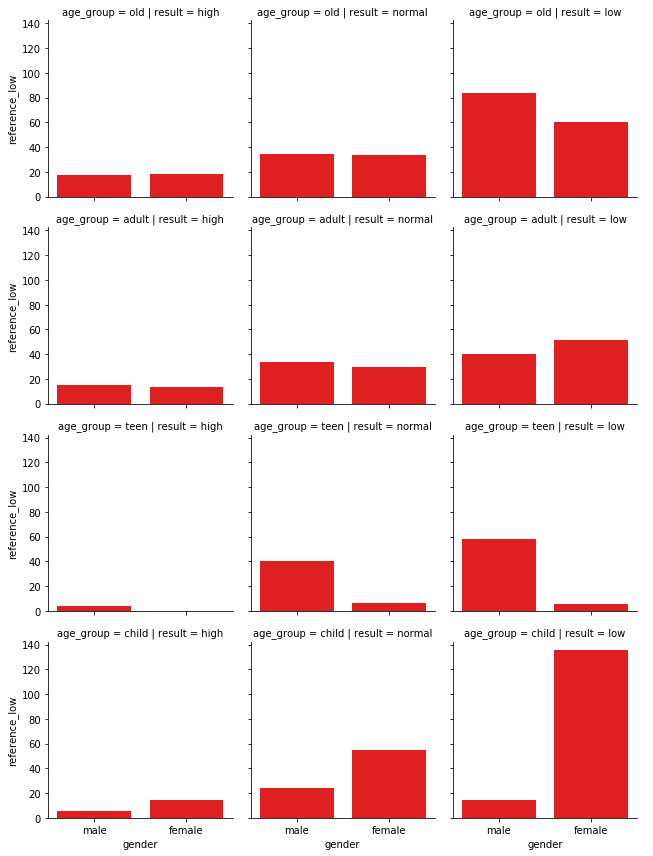

In [72]:
grid = sns.FacetGrid(train_upd, row='age_group', col='result')
grid.map(sns.barplot, 'gender', 'reference_low', ci=None, color='red')
grid.add_legend()

## Analyzing Chloride test and train datasets

C:\Users\HP\Anaconda3\New folder\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


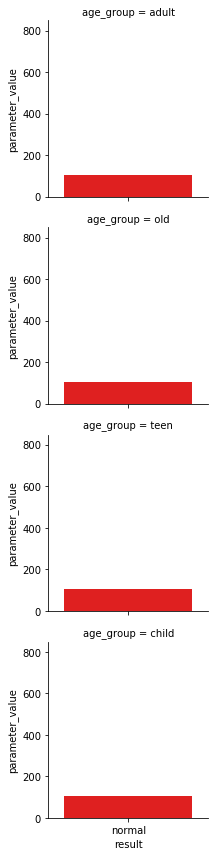

In [111]:
grid = sns.FacetGrid(train_Cl, row='age_group')
grid.map(sns.barplot,'result', 'parameter_value', ci=None, color='red')
grid.add_legend()

C:\Users\HP\Anaconda3\New folder\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


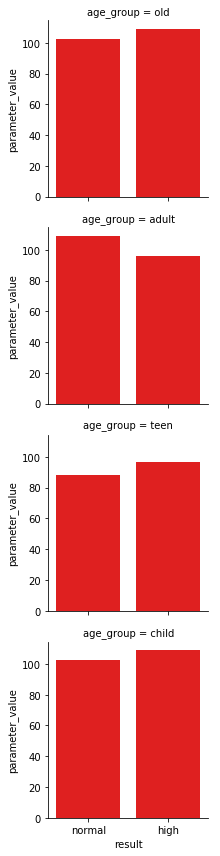

In [109]:
grid = sns.FacetGrid(test_Cl, row='age_group')
grid.map(sns.barplot,'result', 'parameter_value', ci=None, color='red')
grid.add_legend()

# Classification

In [76]:
train_upd['age_group']=train_upd['age_group'].map( {'child': 1, 'teen': 2, 'adult': 3 , 'old':4} ).astype(int)
train_upd['unit'] =train_upd['unit'].astype('category').cat.codes
train_upd['created_at'] =train_upd['created_at'].astype('category').cat.codes
train_upd['gender'] =train_upd['gender'].astype('category').cat.codes
train_upd['result'] =train_upd['result'].astype('category').cat.codes
train_upd['standard_lab_parameter_name'] =train_upd['standard_lab_parameter_name'].astype('category').cat.codes

In [77]:
test_upd['age_group']=test_upd['age_group'].map( {'child': 1, 'teen': 2, 'adult': 3 , 'old':4} ).astype(int)
test_upd['unit'] =test_upd['unit'].astype('category').cat.codes
test_upd['created_at'] =test_upd['created_at'].astype('category').cat.codes
test_upd['result'] =test_upd['result'].astype('category').cat.codes
test_upd['standard_lab_parameter_name'] =test_upd['standard_lab_parameter_name'].astype('category').cat.codes

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
X=train_upd.drop(['gender','age_group'],axis=1)
y=train_upd['age_group']

In [80]:
train_upd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9821 entries, 0 to 9989
Data columns (total 10 columns):
patient_id                     9821 non-null int64
standard_lab_parameter_name    9821 non-null int8
parameter_value                9821 non-null float64
unit                           9821 non-null int8
created_at                     9821 non-null int16
reference_high                 9821 non-null float64
reference_low                  9821 non-null float64
age_group                      9821 non-null int32
gender                         9821 non-null int8
result                         9821 non-null int8
dtypes: float64(3), int16(1), int32(1), int64(1), int8(4)
memory usage: 479.5 KB


In [81]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [82]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [83]:
rf= RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf , param_distributions=random_grid, n_iter=100 , cv=3 , verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 23.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 45.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [84]:
X_test=test_upd.drop(['Unnamed: 0','age_group'],axis=1)
y_test=test_upd['age_group']

In [113]:
Y_pred = rf_random.predict(X_test)
rf_random.score(X,y)
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test, Y_pred))
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, Y_pred)
print('Confusion_Matrix:')
print(cm)

Accuracy: 0.7613496932515338
Confusion_Matrix:
[[  17    2   62    0]
 [   6    1   68    0]
 [   1    0 7307   52]
 [   0    0 2143  121]]


In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logreg = LogisticRegression()
logreg.fit(X, y)

C:\Users\HP\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
Y_pred = logreg.predict(X_test)
logreg.score(X,y)
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test, Y_pred))
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, Y_pred)
print('Confusion_Matrix:')
print(cm)

Accuracy: 0.7525562372188139
Confusion_Matrix:
[[   0    0   81    0]
 [   0    0   75    0]
 [   0    0 7360    0]
 [   0    0 2264    0]]


In [89]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X,y)

C:\Users\HP\Anaconda3\New folder\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

In [115]:

Y_pred = xg.predict(X_test)
xg.score(X,y)
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test, Y_pred))
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, Y_pred)
print('Confusion_Matrix:')
print(cm)

Accuracy: 0.7342535787321064
Confusion_Matrix:
[[  11    7   59    4]
 [   5    3   65    2]
 [   1    4 6974  381]
 [   0    0 2071  193]]


In [91]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier( criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5) 
decision_tree.fit(X, y) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [116]:

Y_pred = decision_tree.predict(X_test)
decision_tree.score(X,y)
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test, Y_pred))
from sklearn.metrics import confusion_matrix 
print('Confusion_Matrix:')
print(cm)

Accuracy: 0.75920245398773
Confusion_Matrix:
[[  11    7   59    4]
 [   5    3   65    2]
 [   1    4 6974  381]
 [   0    0 2071  193]]
